# Honing Skills

## QuTiP

In [8]:
from qutip import *
from numpy import *

In [23]:
import numpy as np
import matplotlib as mpl; import matplotlib.pyplot as plt
%matplotlib inline
import os; import pickle
#import sympy
#import scipy
#from scipy import special

In [11]:
g =1.0*2*pi # coupling strength
g1 = 0.75 # relaxation rate
g2 = 0.05 # dephasing rate
n_th = 0.75 # bath avg. thermal excitations
T = pi/(4*g) # gate period

In [13]:
# construct Hamiltonian
H = g * (tensor(sigmax(), sigmax()) + 
         tensor(sigmay(), sigmay()))
# construct inital state
psi0 = tensor(basis(2,1), basis(2,0))
# construct collapse operators
c_ops = []
## qubit 1 collapse operators
sm1 = tensor(sigmam(), qeye(2))
sz1 = tensor(sigmaz(), qeye(2))
c_ops.append(sqrt(g1 * (1+n_th)) * sm1)
c_ops.append(sqrt(g1 * n_th) * sm1.dag())
c_ops.append(sqrt(g2) * sz1)
## qubit 2 collapse operators
sm2 = tensor(qeye(2), sigmam())
sz2 = tensor(qeye(2), sigmaz())
c_ops.append(sqrt(g1 * (1+n_th)) * sm2)
c_ops.append(sqrt(g1 * n_th) * sm2.dag())
c_ops.append(sqrt(g2) * sz2)

In [14]:
# evolve the dissipative system
tlist = linspace(0, T, 100)
medata  = mesolve(H, psi0, tlist, c_ops, [])

In [15]:
## NEW API CALL ##
# extract density matrices from Odedata object
rho_list = medata.states

In [16]:
# get final density matrix for fidelity comparison
rho_final = rho_list[-1]
# calculate expectation values
n1 = expect(sm1.dag() * sm1, rho_list)
n2 = expect(sm2.dag() * sm2, rho_list)
# calculate the ideal evolution
medata_ideal = mesolve(H, psi0, tlist, [], [])

In [17]:
## NEW API CALL ##
# extract states from Odedata object
psi_list = medata_ideal.states


In [18]:
# calculate expectation values
n1_ideal = expect(sm1.dag() * sm1, psi_list)
n2_ideal = expect(sm2.dag() * sm2, psi_list)
# get last ket vector for comparison
psi_ideal = psi_list[-1]
# output is ket since no collapse operators.
rho_ideal = ket2dm(psi_ideal)


In [19]:
# calculate the fidelity of final states
F = fidelity(rho_ideal, rho_final)

In [32]:
rho_list[-1]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.05351317 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j]
 [ 0.00000000 +0.00000000e+00j  0.79531678 +0.00000000e+00j
   0.00000000 -9.88650146e-06j  0.00000000 +0.00000000e+00j]
 [ 0.00000000 +0.00000000e+00j  0.00000000 +9.88650146e-06j
   0.01408292 +0.00000000e+00j  0.00000000 +0.00000000e+00j]
 [ 0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.13708713 +0.00000000e+00j]]

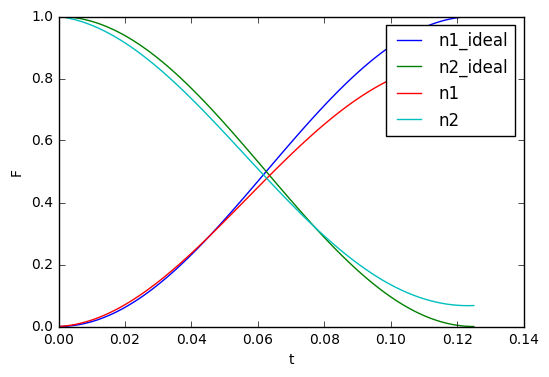

In [38]:
plt.figure()
plt.plot(tlist,n1_ideal,label='n1_ideal')
plt.plot(tlist,n2_ideal,label='n2_ideal')
plt.plot(tlist,n1,label='n1')
plt.plot(tlist,n2,label='n2')
plt.legend()
plt.xlabel('t')
plt.ylabel('F')
plt.show()